In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

microsoft_data=pd.read_csv('train.csv')


In [2]:
microsoft_data.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_

In [3]:
microsoft_data['HasDetections']

0         0.0
1         0.0
2         0.0
3         1.0
4         1.0
         ... 
183100    1.0
183101    0.0
183102    1.0
183103    0.0
183104    NaN
Name: HasDetections, Length: 183105, dtype: float64

In [4]:
#chisquare test between OsBuild and HasDetections
import scipy

from scipy.stats import chi2_contingency

contingency_table=pd.crosstab(microsoft_data['OsBuild'],microsoft_data['HasDetections'])

results=chi2_contingency(contingency_table)

print('p-value',results[1])

#there is some correlation


p-value 2.3608142877761282e-60


In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

SGD=SGDClassifier()

parameter_grid={'l1_ration':[0.15,0.3,0.45,0.6],
               'alpha':[0.0001,0.001,0.01,0.1],
               'learning_rate':['adaptive','optimal']}

grid=GridSearchCV(SGD,cv=5,param_grid=parameter_grid)

grid.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [9]:
import numpy as np #logistic regression sigmoid function

def sigmoid(x):
    return 1/(1+np.exp(-x))

sigmoid(0)

sigmoid(100)

1.0

In [11]:
input_range=range(-100,100)

sigmoid_values=[]

for num in input_range:
    sigmoid_values.append(sigmoid(num))
    
#sigmoid_values
    

[3.7200759760208356e-44,
 1.0112214926104486e-43,
 2.7487850079102147e-43,
 7.47197233734299e-43,
 2.031092662734811e-42,
 5.5210822770285325e-42,
 1.5007857627073948e-41,
 4.07955866717756e-41,
 1.1089390193121365e-40,
 3.014408785065374e-40,
 8.194012623990515e-40,
 2.2273635617957434e-39,
 6.054601895401186e-39,
 1.6458114310822737e-38,
 4.4737793061811207e-38,
 1.2160992992528256e-37,
 3.305700626760734e-37,
 8.985825944049381e-37,
 2.4426007377405277e-36,
 6.639677199580733e-36,
 1.8048513878454153e-35,
 4.906094730649281e-35,
 1.3336148155022612e-34,
 3.625140919143559e-34,
 9.854154686111257e-34,
 2.678636961808078e-33,
 7.281290178321645e-33,
 1.9792598779469048e-32,
 5.380186160021138e-32,
 1.462486227251231e-31,
 3.975449735908647e-31,
 1.0806392777072785e-30,
 2.9374821117108028e-30,
 7.984904245686979e-30,
 2.1705220113036392e-29,
 5.900090541597061e-29,
 1.603810890548638e-28,
 4.359610000063081e-28,
 1.1850648642339812e-27,
 3.2213402859925163e-27,
 8.75651076269652e-27,


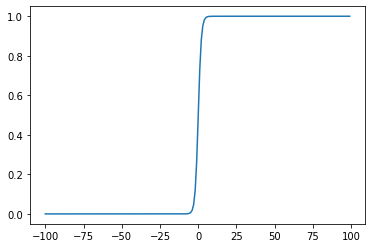

In [12]:
import matplotlib.pyplot as plt

plt.plot(input_range,sigmoid_values)